In [139]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
from matplotlib import collections  as mc
import pandas as pd
import numpy as np
from collections import Counter



In [140]:
#import matplotlib.font_manager as font_manager

#fuente=['/content/HelveticaNeueLTStd-Th.otf',]
#font_manager.FontManager.addfont(path=fuente)
#font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
#font_list = font_manager.createFontList(font_files)
#font_manager.fontManager.ttflist.extend(font_list)

#plt.rcParams['font.family'] = 'HelveticaNeueLTStd-Th.otf'

In [141]:
def puntoyComa(a):
  return '{:,}'.format(a).replace(',','~').replace('.',',').replace('~','.')



In [142]:
db = pd.read_excel("GraficoINDEC M.xlsx")

In [143]:
db

,mesnum,Mes,label x,Año,Expo,media,Impo,media.1,media sin 2009,max expo,min expo,media impo,max impo
0,1,ene,NaN,2009,120.452071,121.545617,122.703727,193.573824,121.636745,138.896245,109.665339,199.479665,262.413652
1,1,ene,NaN,2010,120.104994,121.545617,143.117050,193.573824,NaN,NaN,NaN,NaN,NaN
2,1,ene,NaN,2011,128.478584,121.545617,203.529010,193.573824,NaN,NaN,NaN,NaN,NaN
3,1,ene,NaN,2012,127.729637,121.545617,224.349729,193.573824,NaN,NaN,NaN,NaN,NaN
4,1,ene,NaN,2013,135.467855,121.545617,211.311617,193.573824,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,12,dic,NaN,2016,117.143430,124.138547,209.451522,198.198499,NaN,NaN,NaN,NaN,NaN
151,12,dic,NaN,2017,118.029568,124.138547,242.571984,198.198499,NaN,NaN,NaN,NaN,NaN
152,12,dic,NaN,2018,120.012585,124.138547,174.433438,198.198499,NaN,NaN,NaN,NaN,NaN
153,12,dic,NaN,2019,114.317594,124.138547,145.718613,198.198499,NaN,NaN,NaN,NaN,NaN


In [144]:
meses = db["Mes"].tolist()
cantidadMuestrasMes = Counter(meses)
expo = db["Expo"].to_numpy().tolist()
mediaExpo = db["media"].to_numpy().tolist()
impo = db["Impo"].to_numpy().tolist()
mediaImpo = db["media.1"].to_numpy().tolist()

In [145]:
meses = ['ene','feb','mar','abr','may','jun','jul','ago','sep','oct','nov','dic']
muestrasxMes = [0]
for mes in meses:
  muestrasxMes.append(cantidadMuestrasMes[mes])
muestrasxMes_acum = np.add.accumulate(muestrasxMes).tolist()

In [146]:
#Recorto la serie por cada mes y le agrego valores nulos para correr los meses en el eje x
expoMeses=[]
impoMeses=[]
mediaExpoMeses=[]
mediaImpoMeses=[]
def corrimientoMuestras(datos, promedio):
  for i in range(12):
    for x in range(muestrasxMes_acum[i]):
      datos[i].insert(x, None)
      promedio[i].insert(x, None)

for i in range(12):
  expoMeses.append(expo[muestrasxMes_acum[i]:muestrasxMes_acum[i+1]])
  mediaExpoMeses.append(mediaExpo[muestrasxMes_acum[i]:muestrasxMes_acum[i+1]])


for i in range(12):
  impoMeses.append(impo[muestrasxMes_acum[i]:muestrasxMes_acum[i+1]])
  mediaImpoMeses.append(mediaImpo[muestrasxMes_acum[i]:muestrasxMes_acum[i+1]])
    

#descarto los valores del 2019 porque fue un año de crisis
for i, mes in enumerate(expoMeses):
  expoMeses[i] = mes[2:]
for i, mes in enumerate(impoMeses):
  impoMeses[i] = mes[2:]


In [147]:
expoMeses[11]

[132.8194470595,
 131.4523265128,
 142.5272959016,
 135.5071060782,
 118.1190201468,
 117.1434295612,
 118.0295683026,
 120.0125846378,
 114.3175938268,
 109.51379685020001]

In [148]:
#Extraemos solo los valores del 2021
impoUltimoAnio = []
expoUltimoAnio = []
for mes in expoMeses:
  if len(mes) <11:
    expoUltimoAnio.append('--')
  else:
     expoUltimoAnio.append(puntoyComa(round(mes[-1])))
for mes in impoMeses:
  if len(mes) <11:
    impoUltimoAnio.append('--')
  else:
    impoUltimoAnio.append(puntoyComa(round(mes[-1])))

In [149]:
a = [1,2,3]
a.reverse()
print(a)

[3, 2, 1]


In [150]:
def maxMinLista (val):
  extremosEstac = []
  for mes in val:
    max_val = max(mes)
    max_idx = mes.index(max_val)
    min_val = min(mes)
    min_idx = mes.index(min_val)
    maxi = (max_val,max_idx)
    mini = (min_val,min_idx)
    media = sum(mes)/len(mes)
    extremosEstac.append([maxi,mini,media])
  extremosEstac = list(zip(*extremosEstac[::-1]))
  for i, ex in enumerate(extremosEstac):
    extremosEstac[i] = list(extremosEstac[i])
    extremosEstac[i].reverse()
  return extremosEstac


In [151]:
anios = []
for i in range(13):
  anios.append(str(2011 + i))

In [152]:
def datosTabla(tabla, ultiAnio):
  out = [[],[],[],[]]
  for max in tabla[0]:
    numeros = puntoyComa(round(max[0]))
    out[0].append(str(numeros)+" ("+anios[max[1]]+")")
  for min in tabla[1]:
    numeros = puntoyComa(round(min[0]))
    out[1].append(str(numeros)+" ("+anios[min[1]]+")")
  for prom in tabla[2]:
    numeros = puntoyComa(round(prom))
    out[2].append(str(numeros))
  #agregamos una fila con los valores del 2021
  for dato in ultiAnio:
    out[3].append(dato)
  return out




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


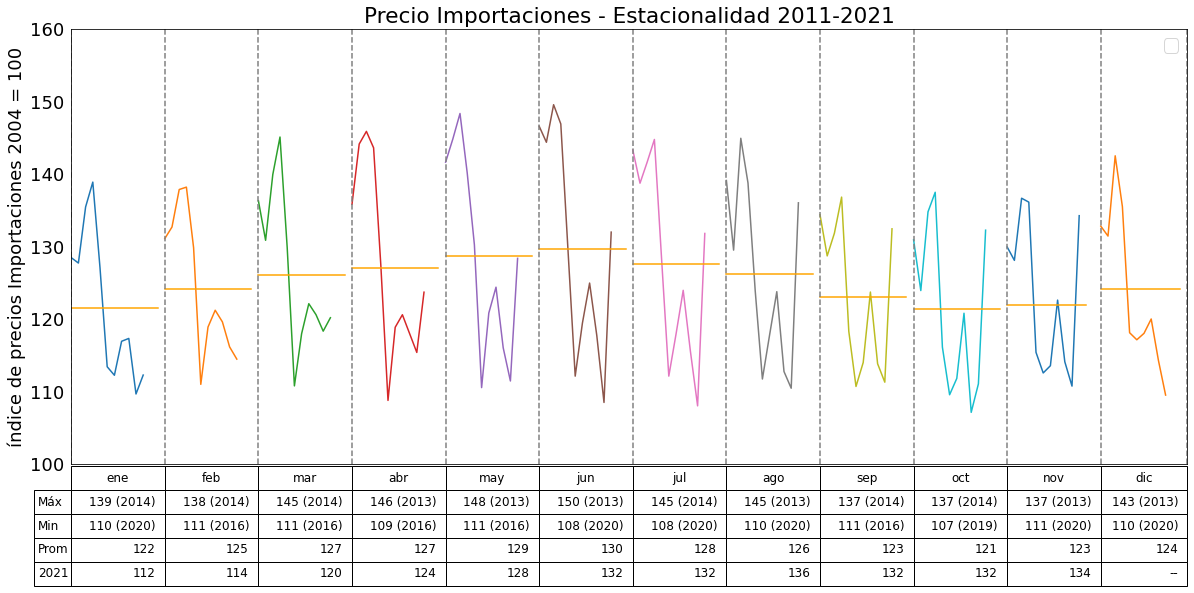

In [153]:
col_with = []
for muestra in muestrasxMes[1:]:
  col_with.append(muestra/sum(muestrasxMes))

plt.figure(figsize=(20, 8))


tabla = plt.table(datosTabla(maxMinLista(expoMeses),
            expoUltimoAnio),
            colLabels=meses,
            rowLabels=['Máx','Min','Prom','2021'],
            colWidths=col_with,
            bbox=[0, -0.28, 1, 0.275],
            )

tabla.auto_set_font_size(False)
tabla.set_fontsize(12)


corrimientoMuestras(expoMeses, mediaExpoMeses)
# plotting the points
for i in range(12):
  plt.plot(expoMeses[i])
  plt.plot(mediaExpoMeses[i], color = "orange")
  i=i+1

 
# naming the x axis
#plt.xlabel('Meses')
# naming the y axis
plt.ylabel('índice de precios Importaciones 2004 = 100')
 
# giving a title to my graph
plt.title('Precio Importaciones - Estacionalidad 2011-2021')

#pongo meses en el eje x
#plt.xticks(muestrasxMes_
# acum, meses, rotation='vertical')
plt.xticks([])
plt.tick_params(left = False, bottom = False)

#dibujo lineas verticales por mes
for muestras in muestrasxMes_acum:
    plt.axvline(muestras, color='grey', linestyle='--' )

#cambio los límites del eje y
plt.ylim(100,160)
 
##armamos un cuadro de texto con los valores minimos y maximos
## place a text box in upper left in axes coords
#textstr = 'Mínimo: ' + str(round(min(expo),2)) + '\n' + 'Máximo: ' + str(round(max(expo),2)) 
#plt.text(2, 7500, textstr, fontsize = 22, 
#         bbox = dict(facecolor = 'wheat', alpha = 0.5))

# function to show the plot
plt.rcParams.update({'font.size': 18})
plt.margins(0)
plt.legend()
plt.savefig('PImpo_estacionalidad.png', transparent=False, dpi=300, bbox_inches = "tight")
plt.savefig('PImpopo_estacionalidad.pdf', transparent=False, dpi=300, bbox_inches = "tight")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


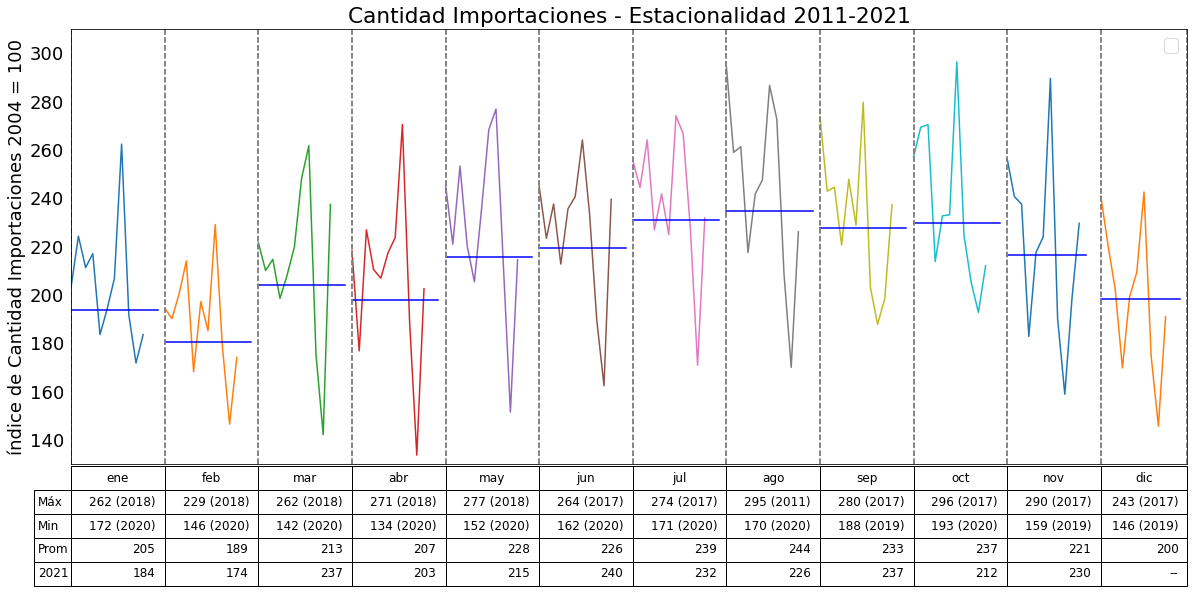

In [154]:

plt.figure(figsize=(20, 8))

plt.table(datosTabla(maxMinLista(impoMeses),
                    impoUltimoAnio),
                    colLabels=meses,
                    rowLabels=['Máx','Min','Prom','2021'],
                    colWidths=col_with,
                    bbox=[0, -0.28, 1, 0.275])
tabla.auto_set_font_size(False)
tabla.set_fontsize(12)

corrimientoMuestras(impoMeses, mediaImpoMeses)
# plotting the points
for i in range(12):
  plt.plot(impoMeses[i])
  plt.plot(mediaImpoMeses[i], color = "blue")
  i=i+1
 
# naming the x axis
#plt.xlabel('Meses')
# naming the y axis
plt.ylabel('índice de Cantidad Importaciones 2004 = 100')
 
# giving a title to my graph
plt.title('Cantidad Importaciones - Estacionalidad 2011-2021')

#plt.xticks(muestrasxMes_acum, meses, rotation='vertical')
plt.xticks([])
plt.tick_params(left = False, bottom = False)
for muestras in muestrasxMes_acum:
    plt.axvline(muestras, color='grey', linestyle='--' )

#dibujo lineas verticales por mes
for muestras in muestrasxMes_acum:
    plt.axvline(muestras, color='grey', linestyle='--' )
 
#cambio los límites del eje y
plt.ylim(130,310)

##armamos un cuadro de texto con los valores minimos y maximos
## place a text box in upper left in axes coords
#textstr = 'Mínimo: ' + str(round(min(impo),2)) + '\n' + 'Máximo: ' + str(round(max(impo),2)) 
#plt.text(2, 7000, textstr, fontsize = 22, 
#         bbox = dict(facecolor = 'wheat', alpha = 0.5))

# function to show the plot
plt.rcParams.update({'font.size': 18})
plt.margins(0)
plt.legend()
plt.savefig('QImpo_estacionalidad.pdf', transparent=False, dpi=300, bbox_inches = "tight")
plt.savefig('QImpo_estacionalidad.png', transparent=False,dpi=300, bbox_inches = "tight")
plt.show()

FAMILIA DE FUENTES
helvetica neueltstd, bold, regular, condensed, condensed bold


https://stackoverflow.com/questions/37211064/aligning-table-to-x-axis-using-matplotlib-python

https://stackoverflow.com/questions/40453531/matplotlib-table-formatting-column-width/46977181

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.table.html